## 군집 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # 경고메시지 숨기기
warnings.filterwarnings('ignore')

In [3]:
mall = pd.read_csv("Mall_Customers.csv")
X = mall[['Annual Income (k$)', 'Spending Score (1-100)']] # Input데이터(*모델에 넣어줄 변수들 묶음)로 고객의 수입과 소비 점수만 사용해서 군집화 하기 위
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


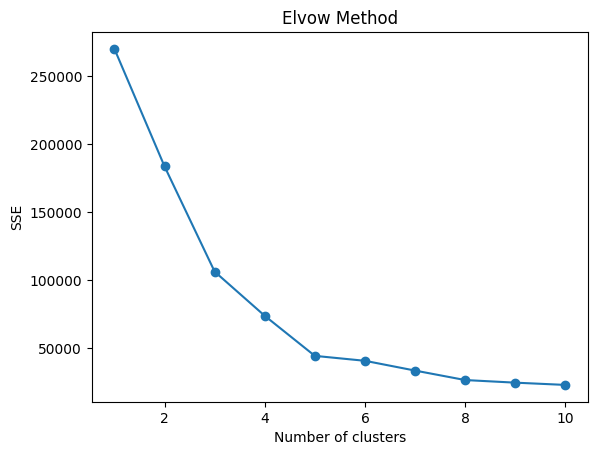

In [25]:
# Elbow Method
from sklearn.cluster import KMeans
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, random_state = 42).fit(X)
  sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elvow Method')
plt.show()

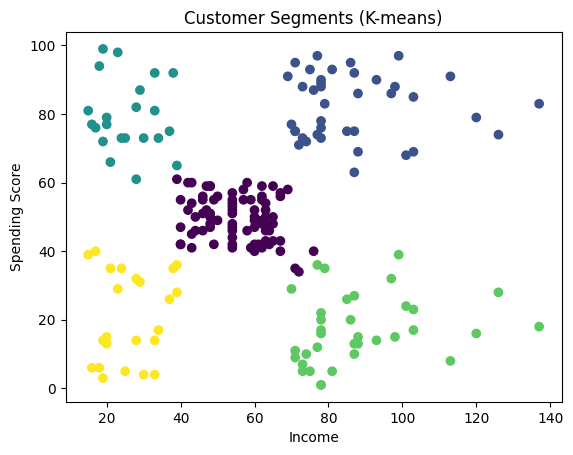

In [27]:
# 최적 K 로 클러스터링 & 시각화
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
mall['Cluster'] = kmeans.labels_

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=mall['Cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments (K-means)')
plt.show()

In [ ]:
# 실습 과제: 군집화 결과 보고, 군집 별 특성 도출하기

## 연관성 분석

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Groceries_dataset.csv")
df

,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [6]:
# comma로 구매목록 되어있는 것 해체(전처리 단계)
df_split = df.iloc[:,0].str.split(',' ,expand = True)
df_split.values

array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [7]:
#value 값의 None 값 지우고 트랜잭션 형태로 바꾸기(전처리단계)
df_split_ary = df_split.values
groceries = []
for i in range(len(df_split_ary)):
  temp = list(filter(None, df_split_ary[i]))
  groceries.append(temp)

groceries

[['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['tropical fruit',
  'cream cheese',

In [9]:
# 트랜잭션 형태로 들어갈 수 있는 전처리 완료. 트랜잭션 형태 데이터 프레임 형태로 만들기
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns = te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# 연관성 분석 1
# 지지도가 5% 이상인 빈번항목집합 탐색
from mlxtend.frequent_patterns import apriori

groceries_ap = apriori(groceries_tr, min_support = 0.01, use_colnames = True)
groceries_ap

,support,itemsets
0,0.033455,(UHT-milk)
1,0.017694,(baking powder)
2,0.052471,(beef)
3,0.033252,(berries)
4,0.026032,(beverages)
...,...,...
328,0.011999,"(tropical fruit, root vegetables, whole milk)"
329,0.014541,"(root vegetables, yogurt, whole milk)"
330,0.010474,"(soda, yogurt, whole milk)"
331,0.015152,"(tropical fruit, yogurt, whole milk)"


In [12]:
# 연관성분석 2
# association_rules 함수 사용해 규칙 파악
from mlxtend.frequent_patterns import association_rules

# 신뢰도가 0.3 이상인 빈번항목집합 탐색
association_rules(groceries_ap, metric = 'confidence', min_threshold = 0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,1.0,0.009574,1.292384,0.512171,0.087191,0.226236,0.238957
1,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,1.0,0.011669,1.332612,0.708220,0.120677,0.249594,0.245455
2,(beef),(whole milk),0.052471,0.255542,0.021253,0.405039,1.585018,1.0,0.007844,1.251271,0.389532,0.074113,0.200813,0.244103
3,(berries),(other vegetables),0.033252,0.193512,0.010270,0.308869,1.596118,1.0,0.003836,1.166909,0.386326,0.047440,0.143035,0.180971
4,(berries),(whole milk),0.033252,0.255542,0.011796,0.354740,1.388187,1.0,0.003299,1.153733,0.289254,0.042584,0.133249,0.200450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"(soda, yogurt)",(whole milk),0.027354,0.255542,0.010474,0.382900,1.498382,1.0,0.003484,1.206381,0.341968,0.038447,0.171074,0.211943
121,"(tropical fruit, yogurt)",(whole milk),0.029286,0.255542,0.015152,0.517361,2.024564,1.0,0.007668,1.542474,0.521334,0.056184,0.351691,0.288326
122,"(tropical fruit, whole milk)",(yogurt),0.042302,0.139516,0.015152,0.358173,2.567255,1.0,0.009250,1.340679,0.637444,0.090909,0.254109,0.233387
123,"(whipped/sour cream, yogurt)",(whole milk),0.020744,0.255542,0.010881,0.524510,2.052539,1.0,0.005580,1.565664,0.523661,0.040996,0.361293,0.283544


In [14]:
# 연관성 분석 3
# 길이(구매아이템) 2 이상, 신뢰도 0.4 이상, 향상도 3 이상
rules = association_rules(groceries_ap, metric= 'lift', min_threshold = 1)

# 규칙 컬럼
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules[(rules['antecedents_len'] >= 2) & (rules['confidence'] >= 0.4) & (rules['lift'] >= 3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_len
418,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,1.0,0.006948,1.949012,0.681957,0.051646,0.486920,0.319903,2
490,"(tropical fruit, root vegetables)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,1.0,0.008231,1.941197,0.683334,0.060835,0.484854,0.324062,2


In [ ]:
# 실습 과제: 최종 도출된 결과 해석하기